# Laboratorio de regresión - 1

## Regresión lineal simple

|                |   |
:----------------|---|
| **Nombre**     | Emilio Navarro  |
| **Fecha**      |  26-01-26 |
| **Expediente** | 757955  |

La regresión lineal es una herramienta útil para predecir una respuesta cuantitativa. Sirve como un punto de partida a pesar de que existen soluciones más modernas.

Observa la siguiente gráfica.

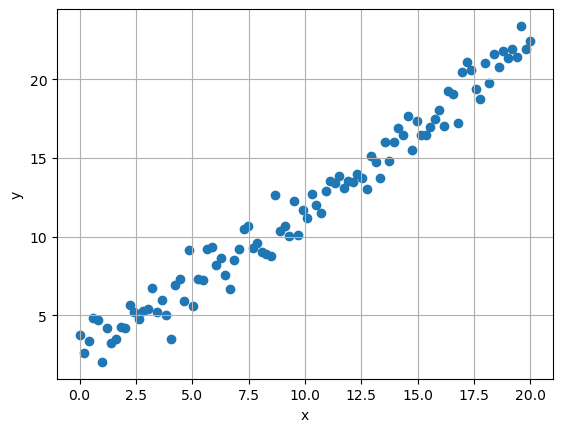

In [13]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(0, 20, 100); y = 2 + x + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

**¿Hay alguna relación entre $y$ y $x$?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- **¿Por qué?** 
- Si hubiera una asociación, **¿qué tan fuerte es?**

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$


A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir el resultado de la variable $y$ basándonos en $x$
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

Nuestros datos contienen 200 muestras en pares ordenados $(x_i, y_i)$. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

**¿Qué significa "que se ajuste bien"?**

Observa las 3 propuestas de lineas para ajustar los puntos.

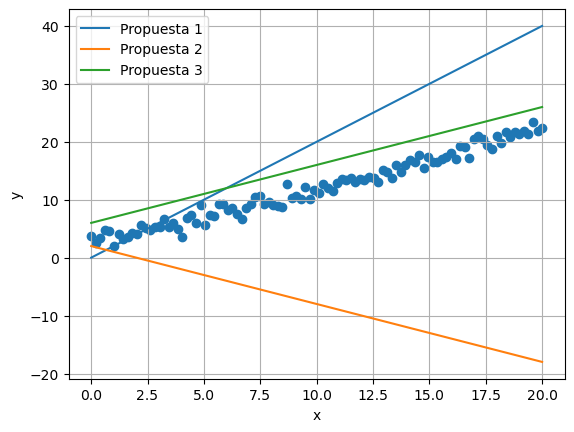

In [14]:
y_pred1 = 2*x; y_pred2 = -x + 2; y_pred3 = 6 + x
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred1, label="Propuesta 1"); plt.plot(x, y_pred2, label="Propuesta 2"); plt.plot(x, y_pred3, label="Propuesta 3")
plt.legend(loc="best")
plt.show()

Claramente hay una línea que se ajusta mejor que las otras dos. ¿Cómo sabemos que esa línea es mejor que las otras?

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza `sklearn` para estimar los parámetros del modelo.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
x= np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(-1, 1)
y = np.array([3.5, 4.8, 5.2, 8.1, 9.7, 12.3, 14.5, 17.1, 19.2, 21.5, 23.8])

# 1. Estimación
modelo = LinearRegression()
modelo.fit(x, y)

# 2. Parámetros
beta_0_sk = modelo.intercept_
beta_1_sk = modelo.coef_[0]

print(f"Estimación: beta_0 = {beta_0_sk:.4f}, beta_1 = {beta_1_sk:.4f}")

Estimación: beta_0 = 2.1045, beta_1 = 1.0595


Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `sklearn` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [4]:
x_simple = x.flatten() 
x_mean = np.mean(x_simple)
y_mean = np.mean(y)

numerador = np.sum((x_simple - x_mean) * (y - y_mean))
denominador = np.sum((x_simple - x_mean)**2)

beta_1_an = numerador / denominador
beta_0_an = y_mean - (beta_1_an * x_mean)

print(f"La Estimacion analitica: beta_0 = {beta_0_an:.4f}, beta_1 = {beta_1_an:.4f}")

son_iguales = np.allclose([beta_0_sk, beta_1_sk], [beta_0_an, beta_1_an])
print(f"\n¿Coinciden estos resultados? {son_iguales}")

La Estimacion analitica: beta_0 = 2.1045, beta_1 = 1.0595

¿Coinciden estos resultados? True


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

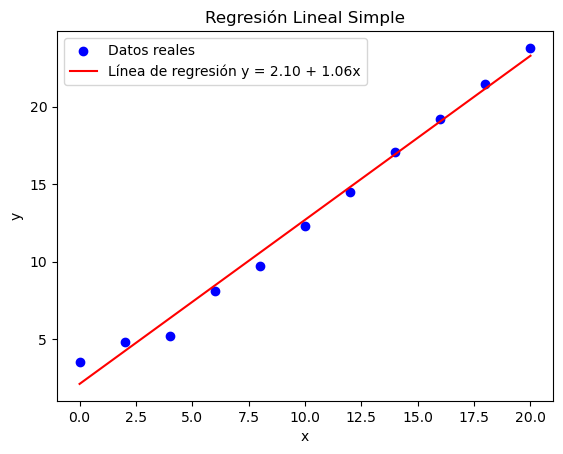

beta_0 estimado: 2.1045454545454536
beta_1 estimado: 1.0595454545454548


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

x = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(-1, 1)
y = np.array([3.5, 4.8, 5.2, 8.1, 9.7, 12.3, 14.5, 17.1, 19.2, 21.5, 23.8])

modelo = LinearRegression()
modelo.fit(x, y)

beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

y_pred = modelo.predict(x)

plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x, y_pred, color='red', label='Línea de regresión y = {:.2f} + {:.2f}x'.format(beta_0, beta_1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()

print(f"beta_0 estimado: {beta_0}")
print(f"beta_1 estimado: {beta_1}")


### Verificando la precisión del modelo

¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

El estadístico $R^2$ se puede encontrar accediendo a la función `score` del objeto `LinearRegression` de `sklearn`.

- **¿Cuánta varianza queda sin explicar?**

### La varianza no explicada corresponde al RSS, ya que representa la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo lineal. Los datos no siguen exactamente una línea recta, por lo que el modelo solo logra ajustarse lo mejor posible, queda un error residual.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3